# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [8]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [9]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs, and it is encouraged for you to do so. Especially during covid and distancing, this can be a way to work with other students and learn alongside one another. As future data scientists, you will often be expected to work with others, and working in pairs can help practice communicating data science concepts.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them. .
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```

<hr style="height:2pt">

<div class="theme"> Overview </div> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

<div style="color: red; background: black">Please note that Question 4 and Question 7 are required for 209a students but are <strong>optional for 109a students</strong>. We include them here for your education, and we believe that if you have time to spend with them you will learn from them. But <strong>if you are in 109a, then Q4 and Q7 are completely optional</strong>. To help manage stress if you are not in 209a, we recommend skipping past these first and then coming back to them once you have finished the rest of the homework if you have time.</div>

In [10]:
#!pip install seaborn

In [11]:
#Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
#sns.set_style("white")
%matplotlib inline

<div class="theme"> Part A: k-NN and Linear Regression</div> 

### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, millage, condition, etc.  

#### Data set 

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs). 
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.

<div class='exercise'><b> Question 1:   Exploratory Data Analysis (EDA) [10 pts]</b></div>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** Which variables are quantitative, and which are categorical? 

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of Kilometers that the cars have?

**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data. 
</div>

## Solutions 

<div class='exercise-r'>  
 
**1.1** Which variables are quantitative, and which are categorical?
 
 </div>

In [13]:
# your code here

df = pd.read_csv("data/car_dekho_full.csv") 
print(df.dtypes)
print("All the variable are quantitative")
df.head()

FileNotFoundError: [Errno 2] File b'data/car_dekho_full.csv' does not exist: b'data/car_dekho_full.csv'

<div class='exercise-r'>  
 
**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`?
 
 </div>

In [ ]:
# name your variables mean_csp, mean_mrp, std_csp, std_mrp
# your code here

print(df.describe())
mean_csp = df.describe().loc['mean', 'Current_Selling_Price']
mean_mrp = df.describe().loc['mean', 'MRP']
std_csp = df.describe().loc['std', 'Current_Selling_Price']
std_mrp = df.describe().loc['std', 'MRP']

# end your code here 


print ("The mean Current Selling Price is", mean_csp,"lakhs")
print ("The mean MRP is", mean_mrp,'lakhs')
print ("The Standard Deviation of Current Selling Price is", std_csp)
print ("The Standard Deviation of MRP is", std_mrp)

<div class='exercise-r'>  
 
**1.3** What is the range of Kilometers that the cars have?
 
 </div>

In [7]:
# your code here

km_min = df.describe().loc['min','Kms_Driven']
km_max = df.describe().loc['max','Kms_Driven']
print ("The range of KMs is", km_max - km_min)


NameError: name 'df' is not defined

<div class='exercise-r'>  
 
**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`?
 
 
 Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.
 </div>

[]

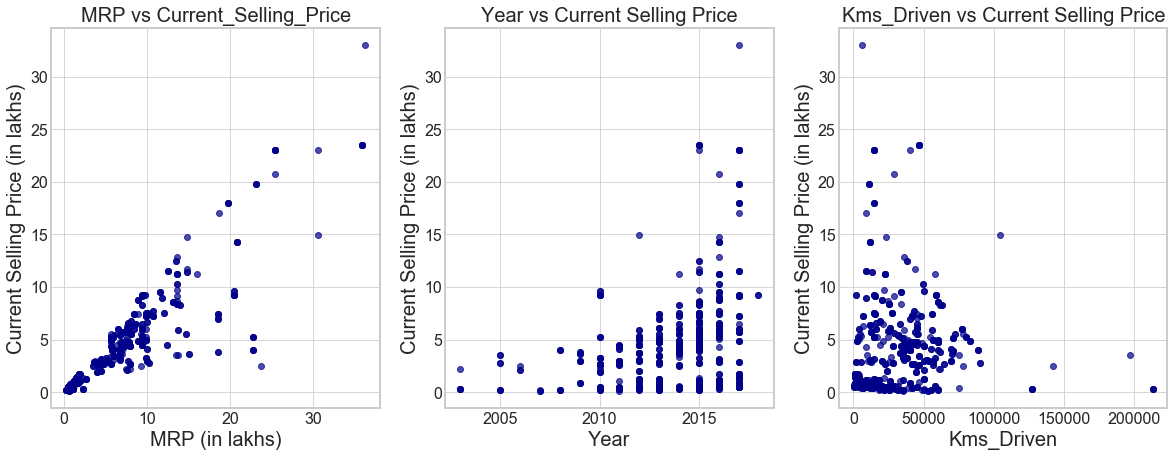

In [9]:
# your code here

fig, axs = plt.subplots(1,3, figsize=(20, 7), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)

axs = axs.ravel()
fontsize = 20

# Plot results
axs[0].scatter(df['MRP'], df['Current_Selling_Price'], alpha=0.7,color='darkblue') #9FC131FF')
# Set labels
axs[0].set_title("MRP vs Current_Selling_Price", fontsize=fontsize)
axs[0].set_xlabel('MRP (in lakhs)', fontsize=fontsize)
axs[0].set_ylabel('Current Selling Price (in lakhs)', fontsize=fontsize)

# Plot results
axs[1].scatter(df['Year'], df['Current_Selling_Price'], alpha=0.7,color='darkblue')
#Set labels
axs[1].set_title("Year vs Current Selling Price", fontsize=fontsize)
axs[1].set_xlabel('Year', fontsize=fontsize)
axs[1].set_ylabel('Current Selling Price (in lakhs)', fontsize=fontsize)

# Plot results
axs[2].scatter(df['Kms_Driven'], df['Current_Selling_Price'], alpha=0.7,color='darkblue')
#Set labels
axs[2].set_title("Kms_Driven vs Current Selling Price", fontsize=fontsize)
axs[2].set_xlabel('Kms_Driven', fontsize=fontsize)
axs[2].set_ylabel('Current Selling Price (in lakhs)', fontsize=fontsize)

plt.plot()   

*your answer here*

There seems to be a linear relationship between MRP and Current Selling Price. There is a unique pattern in the plot Year vs Current Selling price plot. The Kms_Driven seems to not be providing any information about the Current Selling Price

Based on the graphs, MRP seems to be the best predictor for predicting `Current_Selling_Price`

<div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div

We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.

**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

    
INSTRUCTIONS:
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$. 
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots. 
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
- Find the best model based on the test $MSE$ values.
- Evaluate and report the $R^2$ of the best model.

**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.

- How does the value of $k$ affect the fitted model?

- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  

- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
    
    </div>

### Solutions

<div class='exercise-r'>  
 
**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
 
 
 INSTRUCTIONS:
 - Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.
 - Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$.
 - Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
 - Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
 - Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
 - Find the best model based on the test $MSE$ values.
 - Evaluate and report the $R^2$ of the best model.
 
 </div>

In [10]:
#Choosing your predictor and response variable
# your code here
x = df[['MRP']].values
y = df['Current_Selling_Price'].values

In [11]:
##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=109) 

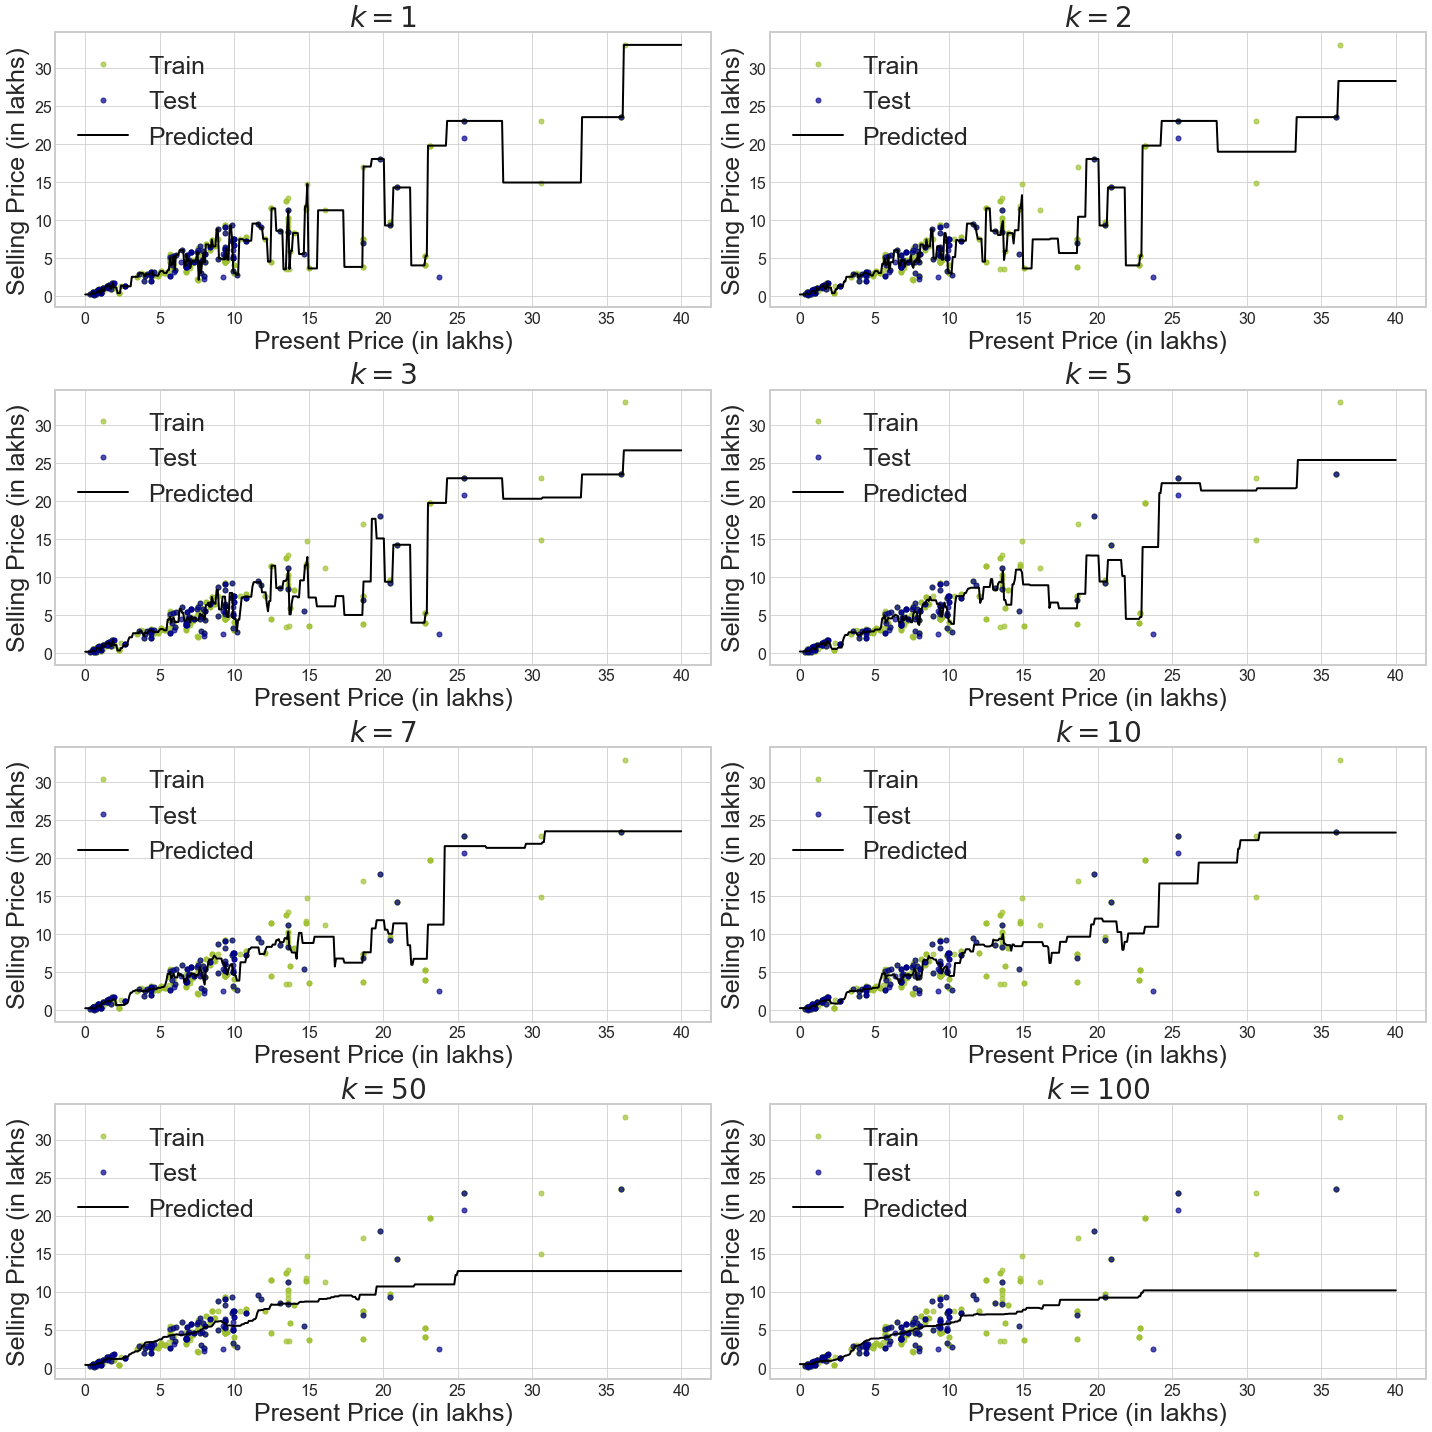

In [12]:
## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,50,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend
# your code here 
# Plotting
fig, axs = plt.subplots(4,2, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)
K = [1,2,3,5,7,10,50,100]
axs = axs.ravel()
fontsize = 25

mse_train = [] # MSE values for training set
mse_test = [] # MSE values for test set

# Loop over the k-values
for i,k in enumerate(K):

    # Create and fit a kNN regressor
    knn_model = KNeighborsRegressor(n_neighbors=k) 
    knn_model.fit(xtrain, ytrain) 

    # Predict on training data
    predicted_price_train = knn_model.predict(xtrain)

    # Predict on test data
    predicted_price_test = knn_model.predict(xtest) 
    Xline = np.linspace(0,40,500).reshape(-1,1)

    # MSE for training data
    mse_train.append( mean_squared_error(ytrain, predicted_price_train)) 

    # MSE for test data
    mse_test.append( mean_squared_error(ytest, predicted_price_test)) 
    
    # Plot results
    axs[i].plot(xtrain, ytrain, '.', alpha=0.7, label='Train',markersize=10,color='#9FC131FF')

    axs[i].plot(xtest, ytest, '.', alpha=0.7, label='Test',markersize=10,color='darkblue')
    
    axs[i].plot(Xline, knn_model.predict(Xline), label='Predicted',color='black', linewidth=2)
    
    axs[i].legend(fontsize=fontsize)

    # Set labels
    axs[i].set_title("$k = " + str(k) + "$", fontsize=fontsize+3)
    axs[i].set_xlabel('Present Price (in lakhs)', fontsize=fontsize)
    axs[i].set_ylabel('Selling Price (in lakhs)', fontsize=fontsize)
    
fig.tight_layout()

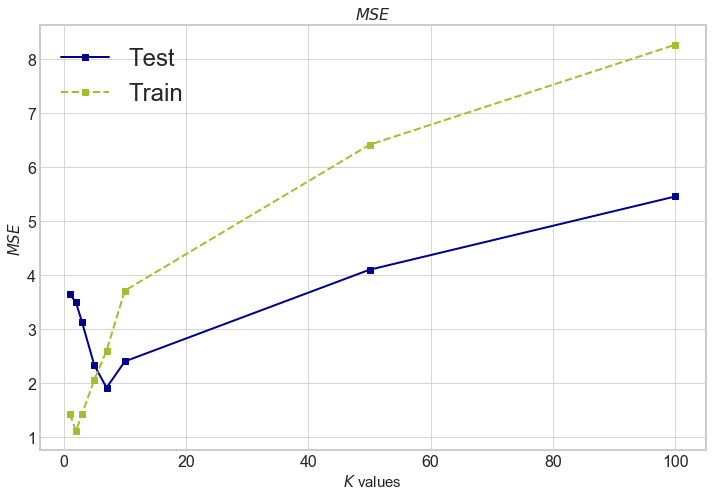

In [13]:
# Now make MSE plots
# your code here


figR2, axR2 = plt.subplots(1,1, figsize=(10,7))
axR2.plot(K, mse_test, 's-', label='Test',color='darkblue',linewidth=2)
axR2.plot(K, mse_train, 's--', label='Train',color='#9FC131FF',linewidth=2)
axR2.set_xlabel(r'$K$ values', fontsize=15)
axR2.set_ylabel('$MSE$', fontsize=15)
axR2.set_title(r'$MSE$')
axR2.legend(fontsize=24)
figR2.tight_layout()

In [14]:
# Find the best model
# your code here



#Find the minimum test MSE
min_mse = mse_test.index(min(mse_test))

#Find the k value associated to the lowest MSE
best_model = K[min_mse]
print("The best k value is", best_model)

#Fit the kNN model for the best k value
knn_model = KNeighborsRegressor(n_neighbors=best_model) 

#Fit the model
knn_model.fit(xtrain, ytrain) 

# Predict on training data
predicted_price_train = knn_model.predict(xtrain)

# Predict on test data
predicted_price_test = knn_model.predict(xtest) 

The best k value is 7


In [15]:
##Compute the R-squared for the best model
# your code here
r2 = r2_score(ytest, predicted_price_test)

print("The R score on the test set of the best model is",r2)

The R score on the test set of the best model is 0.88067733251126


<div class='exercise-r'>  
 
**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
 
 - How does the value of $k$ affect the fitted model?
 
 - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
 
 - Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
 
 - Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
 
 </div>

*your answer here*

a) How does the value of $k$ affect the fitted model?
<br />
Answer: The lower the value of $k$, the more fit the model is. k=1 fits the data at every point. As the values of k increases we the curve becoming smoother. The ideal value of $k$ looks to be around 3-7.

b) If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$? 
<br />
Answer: If $k=n$, all points will receive the same predicted value, equal to the average of all of the points</font> 

c) Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

Answer: The train and test plots of $MSE$ exhibit different trends. For small $k$, the model overfits the data so it achieves a very good $MSE$ on the training set and a very poor $MSE$ on the test data. On the test set, greater $k$ decreases overfitting, and hence the $MSE$ decreases as the $k$ value increases. But too large of $k$ does not allow for enough variation for an accurate prediction, so the test $MSE$ decreases to a point and then increases.

d) Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?

The answer varies each time. This is attributed to the variation in train and test data due to the random split.

<div class='exercise'><b> Question 3:  Simple Linear Regression [25 pts]</b>

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.

- You will use the same 75% training and 25% testing split of the data, using the same random_state = 109. 
- Run a Linear Regression model.
- Report the slope/coefficient and intercept values for the fitted linear model.
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.

**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 

- What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
    </div>


### Solutions

<div class='exercise-r'>  
 
**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
 
 - You will use the same 75% training and 25% testing split of the data, using the same random_state = 109.
 - Run a Linear Regression model.
 - Report the slope/coefficient and intercept values for the fitted linear model.
 - Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
 - Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.
 
 **Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
 
 </div>

In [16]:
# Prepare your data
# your code here

#Assign the predictor and response variables
X = df[['MRP']]
y = df['Current_Selling_Price']

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)

In [17]:
## Fit a linear model to the train data
# your code here
linreg = LinearRegression().fit(X_train,y_train)

#Predict on the train data
y_train_pred = linreg.predict(X_train)

#Predict on the test data
y_test_pred = linreg.predict(X_test)

In [18]:
## Report the slope/coefficient and intercept values for the fitted linear model. 
# your code here
print("Coefficient/Slope of the model: ",linreg.coef_)
print("Intercept of the model: ",linreg.intercept_)

Coefficient/Slope of the model:  [0.61565992]
Intercept of the model:  0.11236987692104439


In [19]:
## Report the $MSE$ and $R^2$ from the training and test sets.
# your code here 
#Compute the MSE of the model
print("MSE of train data",mean_squared_error(y_train, y_train_pred))
print("MSE of test data",mean_squared_error(y_test, y_test_pred))

#Compute the R-squared of the model
r2 = r2_score(y_test, y_test_pred)
print("R-squared of the model is", r2)

MSE of train data 4.713332797955166
MSE of test data 3.136167052174168
R-squared of the model is 0.8052856808135865


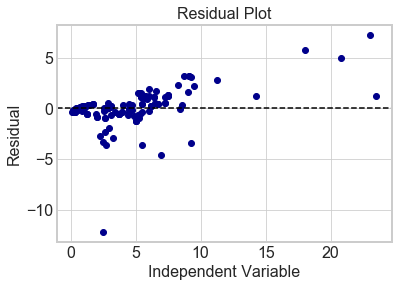

In [20]:
## Plot the **residuals** 
# your code here 
#plt.scatter(X_train,y_train,color='#FF2F92',label='Train data')
#plt.scatter(X_test,y_test,color='darkblue',label='Test data')
#plt.plot(X_test ,y_test_pred,'r',color='#9FC131FF',label='Predicted',linewidth=2)
#plt.plot(X_train,y_train_pred,'r',color='#9FC131FF',linewidth=2)
#plt.xlabel("MRP (in lakhs)")
#plt.ylabel("Current Selling Price (in lakhs)")
#plt.legend()


#Residual Plot
residuals = y_test - y_test_pred
plt.scatter(y_test,residuals, color='darkblue')
plt.axhline(color='black',linestyle='dashed')
plt.title("Residual Plot")
plt.xlabel("Independent Variable");
plt.ylabel("Residual");

<div class='exercise-r'>  
 
**3.2** Discuss your results by answering the following questions.
 
 - How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?
 
 - What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?
 
 - Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
 </div>

*your answer here*

a) How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?
<br />
  <font color='blue'>The $MSE$ is larger than the best case $MSE$ achieved from KNN.</font>  

b) What does the sign of the slope of the fitted linear model convey about the data?  

<font color='blue'> The positive slope implies that the Selling price and the current price of a car are positively related. </font>  



c) Based on the residual plot that you made, discuss whether or not the assumption of linearity is valid for this data.
<br />
<font color='blue'>The assumption of linearity does not seem to be justified, as the residuals are not scattered randomly around 0 and there is a clear structure! Specifically, the model violates the assumption of homoskedasticity; in other words, the variance of the error terms increases as the values of the predictor increase, whereas an assumption is that variance of error term is unrealted to predictor value. </font>


<div class='exercise'><b> Question 4 (for 209a students, optional for others):  Linear Regression with Feature engineering [10 pts]</b>

**4.1** Creating a new variable from existing data: percentage depreciation

Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 

Our previous regression model relates the Current selling price to the MRP of the car with the equation:

$$CSP = \beta_0 + \beta_1*MRP$$

However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car. 

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the percentage depreciation of the Current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
    
Create a new column in your dataframe for `perc`
    
    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs.

a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?

b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?

c) Does there seem to be a relationship between `Kms_Driven` and `perc` ? 

d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?

**4.3** Perform additional EDA 

Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.

**4.4** Fitting a Linear Regression model

Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).

- Again, use the same split train-test sets with training data of 75% and testing data of 25%
- Fit a Linear Regression model for each of the predictors.
- Predict the model for the train and test data
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
- Report the $MSE$ score from the training and test sets.
- Find the best model i.e. the best predictor based on the $MSE$ of each model.

**4.5** Predicting The Current Selling Price using ```perc``` 

After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
    
 </div>

## Solutions

<div class='exercise-r'>  
 
**4.1** Creating a new variable from existing data: percentage depreciation
 
 Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data.
 
 Our previous regression model relates the Current selling price to the MRP of the car with the equation:
 
 $$CSP = \beta_0 + \beta_1*MRP$$
 
 However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car.
 
 Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
 
 From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)).
 
 Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.
 
 Define the percentage depreciation of the Current selling price to the MRP as follows:
 
 $$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
 
 Create a new column in your dataframe for `perc`
 
 
 </div>

In [21]:
# your code here

#Creating a new column perc
df['perc'] = (df['MRP'] - df['Current_Selling_Price'])/df['MRP']
df.head()

,Year,Current_Selling_Price,MRP,Kms_Driven,perc
0,2016,5.25,5.70,3493,0.079
1,2005,3.51,13.70,75000,0.744
2,2010,0.31,1.05,213000,0.705
3,2006,2.10,7.60,50456,0.724
4,2005,0.20,0.57,55000,0.649


<div class='exercise-r'>  
 
**4.2** Exploratory Data Analysis
 
 For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
 
 Answer the following questions by plotting graphs.
 
 a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?
 
 b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?
 
 c) Does there seem to be a relationship between `Kms_Driven` and `perc` ?
 
 d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?
 
 </div>

a)

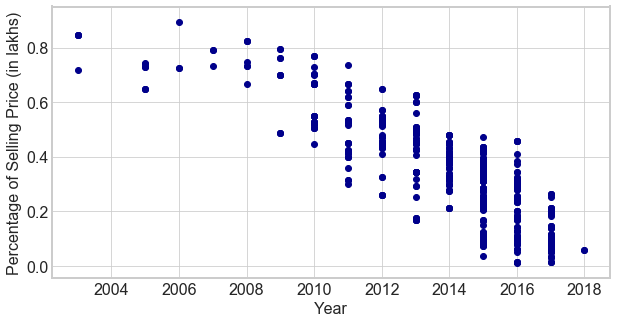

In [22]:
# your code here

plt.figure(figsize=(10,5));
plt.scatter(df['Year'],df['perc'],color='darkblue');
plt.gca().set_xlabel('Year');
plt.gca().set_ylabel('Percentage of Selling Price (in lakhs)');

*your answer here*

Though the graphs look different, on a taking closer look we can see that they have the same underlying relationship. This graphs indicates that the older the car, the lower is it's Selling Price.

b)

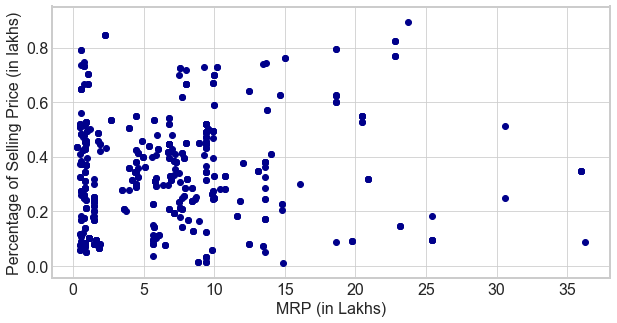

In [23]:
# your code here

plt.figure(figsize=(10,5));
plt.scatter(df['MRP'],df['perc'],color='darkblue');
plt.gca().set_xlabel('MRP (in Lakhs)');
plt.gca().set_ylabel('Percentage of Selling Price (in lakhs)');

*your answer here*

The relationship between `MRP` and `perc` is much different from `MRP` and `Current Selling Price`. Previously, the relationship seemed more or less linear. This graphs shows no relation between the 2 variables.

c)

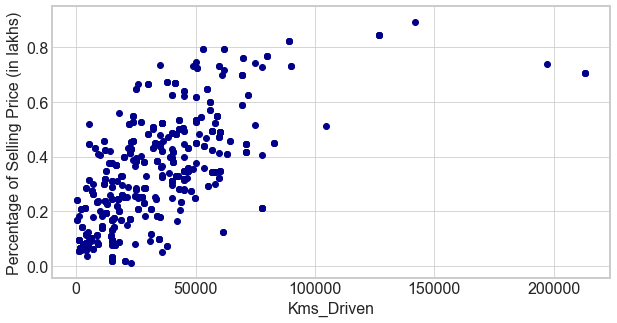

In [24]:
# your code here

plt.figure(figsize=(10,5));
plt.scatter(df['Kms_Driven'],df['perc'],color='darkblue');
plt.gca().set_xlabel('Kms_Driven');
plt.gca().set_ylabel('Percentage of Selling Price (in lakhs)');

d)

*your answer here*

There appears to be a possible positive relationship between `Kms_Driven` and `perc`, although it is also reasonable to look at this visual and conclude that there does not seem to be any perceivable relationship between `Kms_Driven` and `perc`.

*your answer here*

Since there is no single best predictor. One option is to try fitting a model using each of the predictor.

<div class='exercise-r'>  
 
**4.3** Perform additional EDA
 
 Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.
 
 </div>

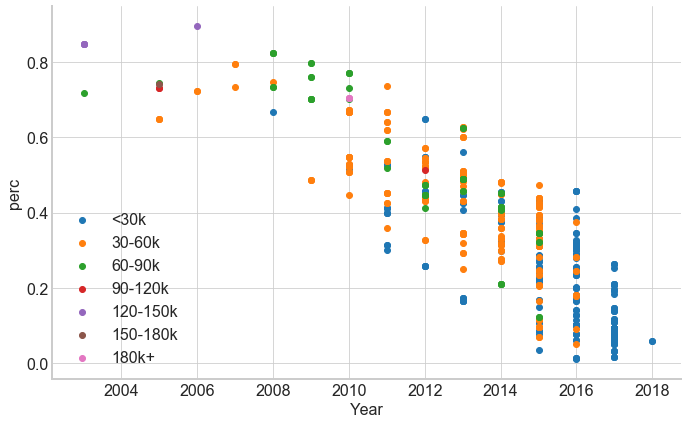

In [25]:
# your code here
# plt.figure(figsize=(10,5))
# for km in np.arange(0,5):
#     idx = np.int64(df['Kms_Driven']/10000)==km
#     plt.scatter(df['Year'].iloc[idx],df['perc'].iloc[idx])

# plt.gca().set_xlabel('Make year')
# plt.gca().set_ylabel('Percentage of Current Selling Price (in lakhs)')


# newdf['bins'] = np.int64(df.Kms_Driven/30000)
# bins = list(newdf.bins.unique())

# Hargun here again, just ignore
# Plot colorful

newdf = df.copy()

newdf['bins'] = np.int64(df.Kms_Driven/30000)

bins = newdf.bins.unique()

bins.sort()

fg = sns.FacetGrid(data= newdf, hue = 'bins',hue_order = bins,
                  height = 6, aspect = 1.61)
fg.map(plt.scatter, 'Year','perc')
plt.legend(['<30k','30-60k','60-90k','90-120k','120-150k','150-180k','180k+'],loc='lower left');

<div class='exercise-r'>  
 
**4.4** Fitting a Linear Regression model
 
 Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).
 
 - Again, use the same split train-test sets with training data of 75% and testing data of 25%
 - Fit a Linear Regression model for each of the predictors.
 - Predict the model for the train and test data
 - Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
 - Report the $MSE$ score from the training and test sets.
 - Find the best model i.e. the best predictor based on the $MSE$ of each model.
 
 </div>

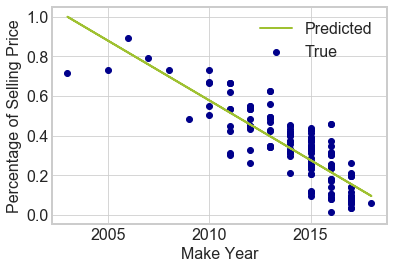

The MSE for this model is 0.009921906416753296


In [26]:
# your code here

#Linear Regression using Year as the reponse variable
X = df[['Year']]
y = df['perc']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)

#Fitting a linear regression model
linreg = LinearRegression().fit(X_train,y_train)

#Predicting on the train and test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

#Plot the curve
plt.scatter(X_test,y_test,color='darkblue',label='True')
plt.plot(X_test,y_test_pred,'r',color='#9FC131FF',label='Predicted',linewidth=2)
plt.xlabel("Make Year")
plt.ylabel("Percentage of Selling Price")
plt.legend()
plt.show()

#Computing the mse
year_mse = mean_squared_error(y_test, y_test_pred)
print("The MSE for this model is", year_mse)

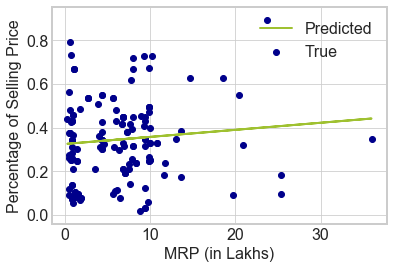

The MSE for this model is 0.03246722789132968


In [27]:
# your code here

#Linear Regression using MRP as the reponse variable
X = df[['MRP']]
y = df['perc']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)

#fitting a linear regression model
linreg = LinearRegression().fit(X_train,y_train)

#Predicting on the train and test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

#Plot the curve
plt.scatter(X_test,y_test,color='darkblue',label='True')
plt.plot(X_test,y_test_pred,'r',color='#9FC131FF',label='Predicted',linewidth=2)
plt.xlabel("MRP (in Lakhs)")
plt.ylabel("Percentage of Selling Price")
plt.legend()
plt.show()

#Computing the mse
mrp_mse = mean_squared_error(y_test, y_test_pred)
print("The MSE for this model is", mrp_mse)

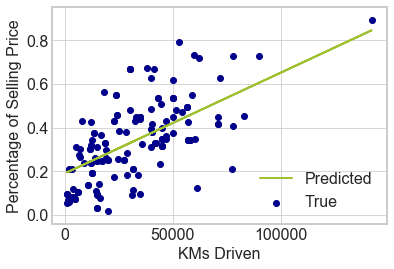

The MSE for this model is 0.019407726530960578


In [28]:
# your code here

#Linear Regression using KMs Driven as the reponse variable
X = df[['Kms_Driven']]
y = df['perc']

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)

#fitting a linear regression model
linreg = LinearRegression().fit(X_train,y_train)

#Predicting on the train and test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

#Plot the curve
plt.scatter(X_test,y_test,color='darkblue',label='True')
plt.plot(X_test,y_test_pred,'r',color='#9FC131FF',label='Predicted',linewidth=2)
plt.xlabel("KMs Driven")
plt.ylabel("Percentage of Selling Price")
plt.legend()
plt.show()

#Computing the mse
km_mse = mean_squared_error(y_test, y_test_pred)
print("The MSE for this model is", km_mse)

*your answer here*

For linear regression, `year` seems to be the best predictor to predict `perc`.

<div class='exercise-r'>  
 
**4.5** Predicting The Current Selling Price using ```perc```
 
 After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
 
 </div>

In [29]:
# your code here

#Linear Regression using Year as the reponse variable

X = df['Year'].values
y = df['perc'].values

#Splitting the data into train and test sets

idx_train, idx_test = train_test_split(np.arange(X.shape[0]), test_size=0.25, random_state=109)

#Fitting a linear regression model
linreg = LinearRegression().fit(X[idx_train].reshape(-1,1),y[idx_train].reshape(-1,1))

#Predicting on the train and test sets
y_train_pred = linreg.predict(X[idx_train].reshape(-1,1))
y_test_pred = linreg.predict(X[idx_test].reshape(-1,1))


# Predict the current selling price with the help of ```prec```
df['csp_pred'] = df['MRP']*(1 - linreg.predict(X.reshape(-1,1)).flatten())

# Calculating the $R^2$ error for the test set and the csp_predictions

cspvals = df['Current_Selling_Price'].values[idx_test]

csp_pred_vals = df['csp_pred'].values[idx_test]

testval = r2_score(cspvals, csp_pred_vals)

print(f'The test set $R^2$ is: {testval:0.2f} ')

The test set $R^2$ is: 0.96 


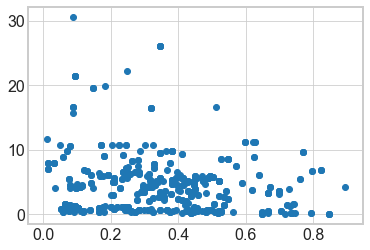

In [30]:
plt.scatter(df['perc'], df['csp_pred'])

*your answer here*

Answer: The previous linear regression model was a linear relationship between CSP & MRP.

$$CSP = \beta_0 + \beta_1*MRP$$

The model does not perform as well (low test R2) because we are missing non-linear interaction terms between Sales Price & Year.

However, the new ```depreciation``` model between year and % drop in price intelligently incorporates interaction terms between Maximum Retail Price & Year as shown below:

$$ \% Depreciation(q) = \dfrac{MRP - CSP}{MRP} = \beta_0 + \beta_1*Year$$

i.e $$CSP = (1-\beta_0)*MRP - \beta_1*Year*MRP$$

<div class="theme"> Part Β :  Multi-Linear Regression</div> 

### Problem Description: 

Analysis of publically available profiles on simplymarry.com to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the SimplyMarry.com site and given in `Income_prediction.csv'.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ':3, 'Wheatish Medium ': 4, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are less likely to hide any deeply held cultural or sociological biases or preferences in order to be perceived as being politically or socially "correct". This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias, referred to as "social desirability bias." However, the possibility of bias persists; it might be possible to imagine somebody selecting that drinking "doesn't matter" but they might still have some type of preference, unconscious or conscious. 

This is a dataset designed to help us think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as a possible relationship between bias and factors like education, local environment, or age.


<div class='exercise'><b> Question 5:   Using Data science to learn more about Indian society [25 pts]</b></div>

First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.

Answer the below questions using plots & simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and the income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?

**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?

**5.7** Is the income lower or high for those living in 'nuclear' families?

**5.8** What is the average effect of the 'Manglik' variable on income?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.
 
 </div>

In [31]:
# your code here 
# Read the file named "Income_prediction.csv"
df = pd.read_csv('data/Income_prediction.csv')

# Creating this only for now. Later we will have two .csvs, train & test
mask = np.ones(len(df))
itrain, itest = train_test_split(range(len(df)),train_size=0.8,random_state = 109)
mask[itest] = 0
mask = mask==1

# A quick look of the dataframe
df.head()

,age,gender,height,kgs,bmi,eating,status,marital_status,family_type,manglik,horoscope,drinking,smoking,values,complexion,body,caste_imp,employed,living,education,income,city
0,25,1,62,50,20.161,4,1,1,2,0,1,1,1,2,2,1,1,4,1,0,2500,12
1,28,0,66,62,22.062,2,2,1,2,2,1,1,1,2,2,2,1,4,1,2,7500,8
2,31,1,68,57,19.107,2,1,1,1,1,1,1,1,2,2,2,1,4,0,2,7500,8
3,30,1,69,72,23.441,2,1,1,1,1,1,1,1,5,2,1,0,5,0,2,7500,8
4,34,0,63,58,22.651,4,1,4,1,0,1,1,1,2,2,2,0,4,1,2,4167,10


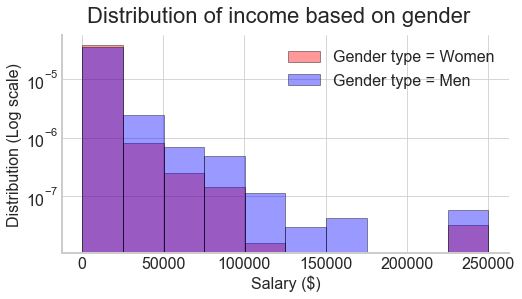

In [32]:
# your code here

gendermap = {1:'Men',0:'Women'}
colors = ['red','blue']
fig, ax = plt.subplots(1,1, figsize=(8,4))
for i in range(2):
    ax.hist(df[df.gender==i].income, log=True, 
            label = f'Gender type = {gendermap[i]}',
            alpha=0.4,color = colors[i], bins = 10,density=True,edgecolor='k')
    ax.legend(loc='best')
    ax.set_xlabel('Salary ($)')
    ax.set_ylabel('Distribution (Log scale)')

fig.suptitle('Distribution of income based on gender');
sns.despine()

<div class='exercise-r'>  
 
**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.
 
 </div>

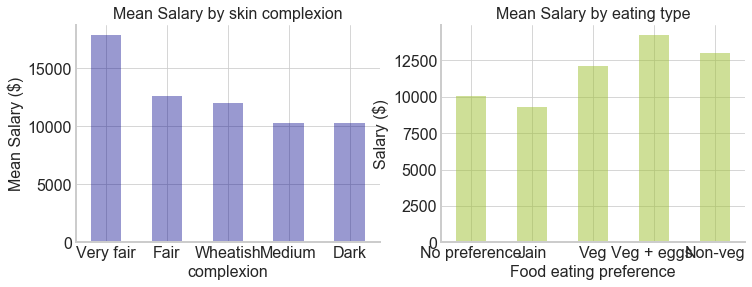

In [33]:
# your code here 
fig, ax = plt.subplots(1,2, figsize =(12,4))
df.groupby(['complexion']).mean().income.plot(kind = 'bar',color = 'darkblue',alpha = 0.4,ax=ax[0])
ax[0].set_ylabel('Mean Salary ($)')
ax[0].set_title('Mean Salary by skin complexion')
ax[0].set_xticklabels(['Very fair','Fair','Wheatish','Medium','Dark'],rotation=0)

df.groupby(['eating']).mean().income.plot(kind = 'bar', color = '#9FC131FF', alpha = 0.5, ax=ax[1])
ax[1].set_xticklabels(['No preference','Jain','Veg','Veg + eggs ','Non-veg'],rotation=0)
ax[1].set_xlabel('Food eating preference')
ax[1].set_ylabel('Salary ($)')
ax[1].set_title('Mean Salary by eating type');
sns.despine()

<div class='exercise-r'>  
 
**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?
 
 </div>

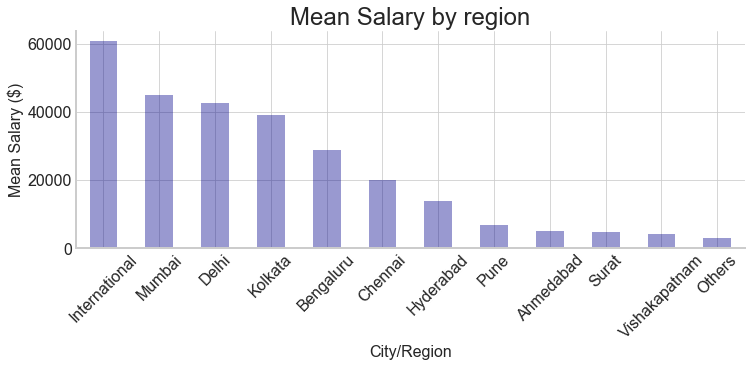

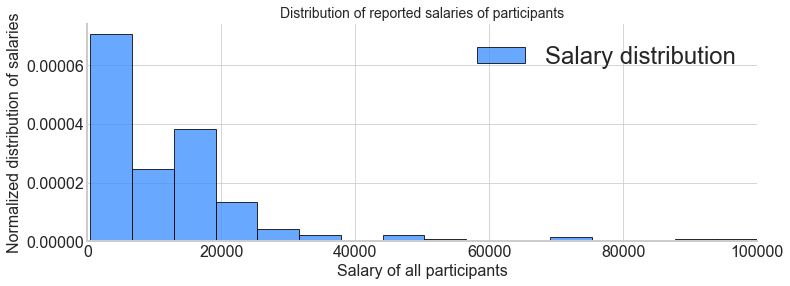

In [34]:
# your code here

country_list = ['International', 'Mumbai', 'Delhi', \
                'Kolkata','Bengaluru', 'Chennai', 'Hyderabad', \
                'Pune', 'Ahmedabad','Surat', 'Vishakapatnam', 'Others']
fig, ax = plt.subplots(1,1, figsize =(12,4))
df.groupby(['city']).mean().income.plot(kind = 'bar',color = 'darkblue',alpha = 0.4,ax=ax)
ax.set_ylabel('Mean Salary ($)',fontsize=16)
ax.set_xlabel('City/Region',fontsize=16)
ax.set_title('Mean Salary by region',fontsize=24)
ax.set_xticklabels(country_list,rotation=45)
sns.despine()

fig, ax = plt.subplots(figsize = (12,4))
N, bins, patches = ax.hist(df.income, bins = 40, color = '#4492ff', alpha = 0.8,density=True, label = 'Salary distribution',histtype = 'bar',edgecolor='k')
mu, std = norm.fit(df.income.values)
x = np.linspace(0, 100000, 5000)
p = norm.pdf(x, mu, std)
ax.set_xlim([0,100000])
ax.legend(loc='upper right', fontsize = 24)
#plt.style.use('seaborn-notebook')
ax.set_xlabel('Salary of all participants')
ax.set_ylabel('Normalized distribution of salaries');
ax.set_title('Distribution of reported salaries of participants',fontsize=14)
sns.despine()

<div class='exercise-r'>  
 
**5.4** Is there a clear trend between BMI and the income?
 
 </div>

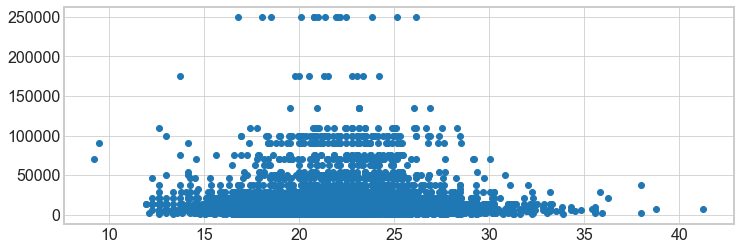

In [35]:
# your code here

fig, ax = plt.subplots(1,1, figsize =(12,4))
plt.scatter(df.bmi, df.income)

<div class='exercise-r'>  
 
**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?
 
 </div>

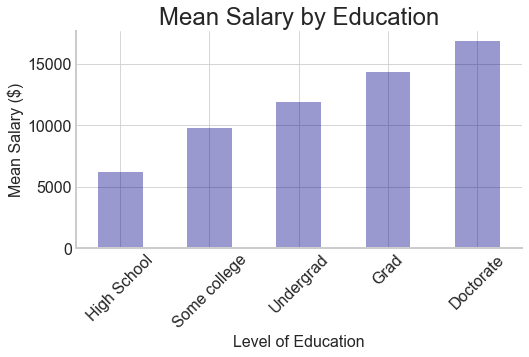

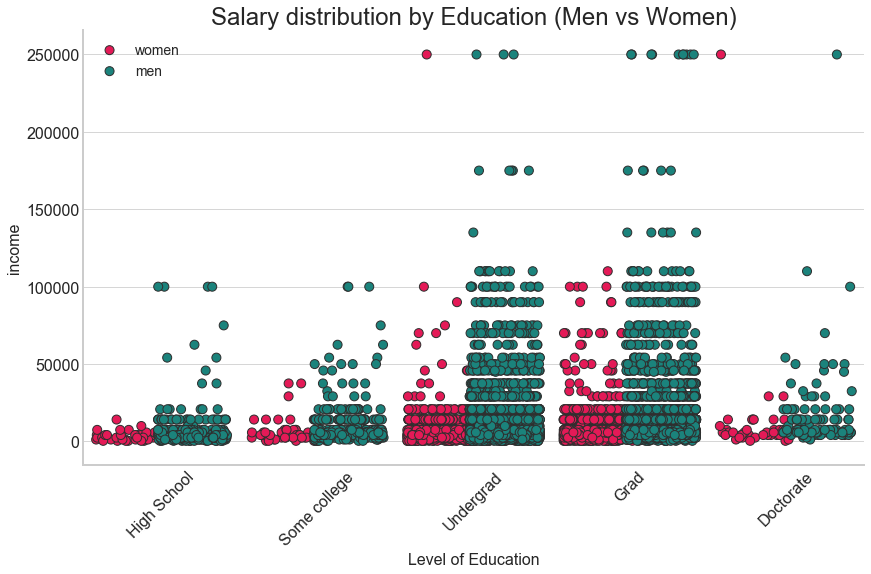

In [36]:
# your code here

fig, ax = plt.subplots(1,1, figsize =(8,4))
df.groupby(['education']).mean().income.plot(kind = 'bar',color = 'darkblue',alpha = 0.4,ax=ax)
ax.set_ylabel('Mean Salary ($)',fontsize=16)
ax.set_xlabel('Level of Education',fontsize=16)
ax.set_title('Mean Salary by Education',fontsize=24)
ax.set_xticklabels(['High School', 'Some college','Undergrad','Grad','Doctorate'],rotation=45)
sns.despine()

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.stripplot(x = df.education,y=df.income,hue = df.gender,jitter=0.45,dodge=True,
                  palette=sns.husl_palette(2, l=0.5, s=.95),size=9,linewidth=1)
ax.set_xticklabels(['High School', 'Some college','Undergrad','Grad','Doctorate'],rotation=45)
plt.legend(['women','men'],fontsize=14,loc = 'upper left')
ax.set_xlabel('Level of Education',fontsize=16)
ax.set_title('Salary distribution by Education (Men vs Women)',fontsize=24)
sns.despine()

<div class='exercise-r'>  
 
**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
 
 </div>

In [37]:
# your code here
df.dtypes

age                 int64
gender              int64
height              int64
kgs                 int64
bmi               float64
eating              int64
status              int64
marital_status      int64
family_type         int64
manglik             int64
horoscope           int64
drinking            int64
smoking             int64
values              int64
complexion          int64
body                int64
caste_imp           int64
employed            int64
living              int64
education           int64
income              int64
city                int64
dtype: object

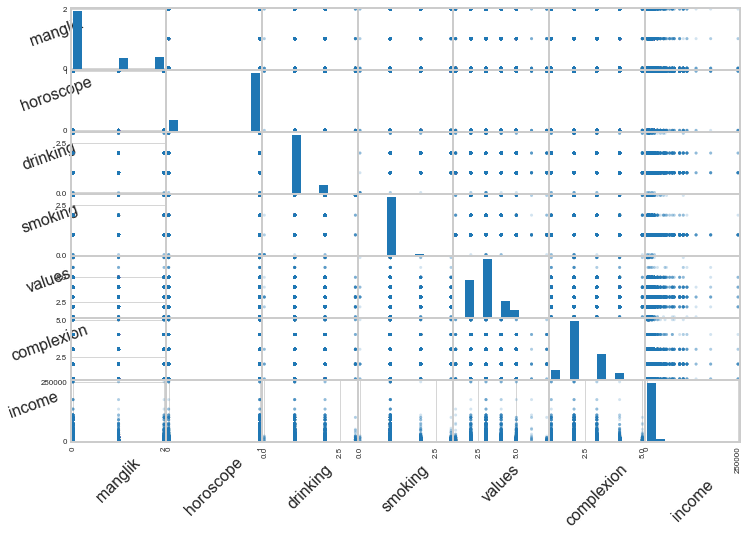

In [38]:
# your code here

attributes1 = ['age', 'gender', 'height', 'kgs', 'bmi', 'eating', 'income']
attributes2 = ['status', 'marital_status', 'family_type', 'income']
attributes3 = ['manglik', 'horoscope', 'drinking','smoking', 'values', \
               'complexion', 'income']
attributes4 = ['body', 'caste_imp', 'employed','living', 'income']
attributes5 = ['education', 'income', 'city', 'income']

scatter = pd.plotting.scatter_matrix(df[attributes3], alpha=0.2, figsize=(12,8));
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), rotation = 20)

<div class='exercise-r'>  
 
**5.7** Is the income lower or high for those living in 'nuclear' families?
 
 </div>

In [39]:
set(df.family_type)

{0, 1, 2, 3}

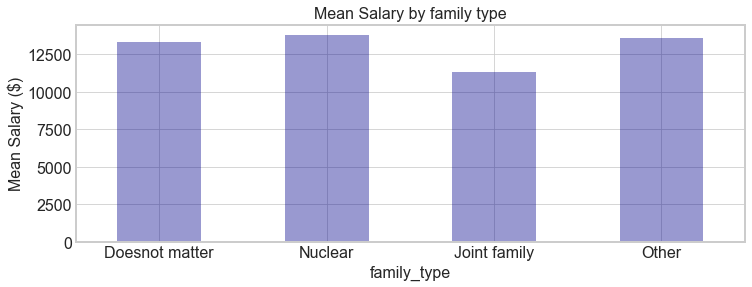

In [40]:
# your code here

# your code here 
fig, ax = plt.subplots(1, figsize =(12,4))
df.groupby(['family_type']).mean().income.plot(kind = 'bar',color = 'darkblue',alpha = 0.4,ax=ax)
ax.set_ylabel('Mean Salary ($)')
ax.set_title('Mean Salary by family type')
ax.set_xticklabels(['Doesnot matter','Nuclear','Joint family','Other'],rotation=0);

<div class='exercise-r'>  
 
**5.8** What is the average effect of the 'Manglik' variable on income?
 
 </div>

In [41]:
# your code here

man_df = df[df['manglik']!=2]

x = man_df[['manglik']]
y = man_df['income']
model = LinearRegression()
man_model = model.fit(x,y)

print(f'Mangliks on average earn {man_model.coef_[0]: .2f} compared those who are not manglik per year')



Mangliks on average earn -1169.36 compared those who are not manglik per year


<div class='exercise'><b> Question 6:  Calculate the Gini Index [15 pts]</b></div>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset

**6.2** Compare your gini index with other countries.

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?

Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
 
 </div>

In [42]:
# your code here

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

print(f"the Gini Index for this dataset is {np.round(gini(df.income.values.astype('float64')),2)}")

the Gini Index for this dataset is 0.5


<div class='exercise-r'>  
 
**6.2** Compare your gini index with other countries.
 
 According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25.
 
 Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?
 
 Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
 
 </div>

0.5 is less than 0.6, so this dataset's estimate for India's Gini Index would stipulate that India is *more equal* in income than South Africa. It is *more concentrated* in terms of income distribution (more money at higher incomes, less money at lower incomes) than Ukraine.

Data source is unreliable and potentially old, self-report skews, the people who are able to know about this site might be older / more technologically literate and thus higher income which could skew the Gini estimate, there might be people who lie about their location and they are not Indian at all, this is not a random sample, etc.

<div class='exercise'><b> Question 7 (for 209a students, optional for others):  Multi-Linear Regression [10 pts]</b>

Now we increase the scope of our analysis to solve another problem that is related to income of the participants.
</div>

![](https://github.com/hargun3045/blog-dump/blob/master/modi.png?raw=true)

Owing to a large number of people underreporting their income to evade taxes, the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on commonly available information.

This will help the department red flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given dataset, using both categorical and continuous predictors that are available.

As with all other homework problems, this is a learning exercise; in the real world, it is your decision to choose the types of data science projects you will work on as well as which clients you will work with. 

Fit a multiple linear regression model to the training set.
Use the `sklearn` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit a multiple linear regression model on the training set
- Predict on train and test sets
- Calculate the MSE for the train & test set
- Report the $R^2$ score on the test set.
- Make a plot of Residuals vs Log of predicted values $\hat{y}$, with residuals on the $Y$-axis and predicted values on the $X$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $Y$-axis.
- Plot a histogram of the magnitudes of the residuals.

#### Optional Outputs
You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:
- Polynomial terms for continous variables
- Interaction terms between variables
- Feature selection among given predictors


The train mse value is 0.242 and the test value is 0.232 
The train R squared value is 0.727 and the test value is 0.720 


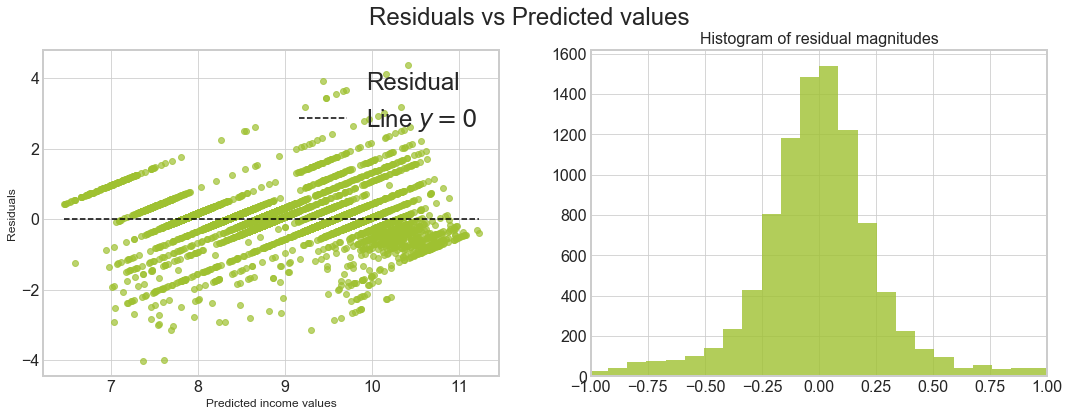

In [43]:
# your code here

cat_vars = []
for col in df.columns.to_list():
#    if (len(df[col].unique()) > 2) and (len(df[col].unique()) < 10):
    if (len(df[col].unique()) < 15):
        cat_vars.append(col)
cont_vars = ['age','height','kgs','bmi']

# Log trick
def logprepros(df,mask, cat, cont):
    dftrain = df[mask]
    dftest = df[~mask]
    one_hotdf = pd.get_dummies(df[cat], columns=cat, drop_first=True)
    onehot_train = one_hotdf[mask]
    onehot_test = one_hotdf[~mask]
    standard_train = pd.DataFrame()
    standard_test = pd.DataFrame()
    for var in cont:
        standard_train[var] = (dftrain[var] - dftrain[var].mean())/dftrain[var].std()
        standard_test[var] = (dftest[var] - dftrain[var].mean())/dftrain[var].std()
    
    Xtrain = standard_train.join(onehot_train).values
    Xtest = standard_test.join(onehot_test).values
    ytrain = np.log(dftrain.income)
    ytest = np.log(dftest.income)
#    ytest = np.log(df[~mask].income)
    return Xtrain,Xtest,ytrain, ytest

X_train, X_test, y_train, y_test = logprepros(df, mask, cat_vars, cont_vars)

# Fitting the model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

## Calculate the $R^2$ values

# train
trainmse = mean_squared_error(y_train, linreg.predict(X_train))
trainval = r2_score(y_train, linreg.predict(X_train))

# test
testmse = mean_squared_error(y_test, linreg.predict(X_test))
testval = r2_score(y_test,linreg.predict(X_test))

print(f'The train mse value is {trainmse:.3f} and the test value is {testmse:.3f} ')
print(f'The train R squared value is {trainval:.3f} and the test value is {testval:.3f} ')

## Plot the residuals as a function of predicted values

yp = linreg.predict(X_train)
yp = np.array([i if i>0 else 0 for i in yp])
y = y_train

fig, ax = plt.subplots(1,2,figsize = (18,6))
ax[0].plot(yp,yp - y,'o',color='#9FC131FF',alpha=0.7,label = 'Residual')
ax[0].plot([yp.min(),yp.max()],[0,0],'k--',label = 'Line $y=0$')
#ax[0].set_ylim([-1,1])
# Aesthetics
ax[0].set_xlabel('Predicted income values',fontsize = 12)
ax[0].set_ylabel('Residuals',fontsize=12)
ax[0].legend(loc='upper right',fontsize=24)
fig.suptitle('Residuals vs Predicted values',fontsize = 24);

ax[1].set_title('Histogram of residual magnitudes')
ax[1].hist(yp - y, color = '#9FC131FF', alpha = 0.8, bins = 100);
ax[1].set_xlim([-1,1]);